In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')


#Importing Required Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os  #for directories
import math  #for mathematical computations
import shutil  #for movinf files from one folder to another
import glob as gb #for avoid writing whole path of file
import cv2  #for handling images


## Extract the Dataset


Create a folder in Google Drive under Colab Notebooks folder named dataset, where we'll be extracting our main zip file.

In [5]:
if not os.path.exists('/content/drive/My Drive/Colab Notebooks/New_Brain_Tumor_Dataset'):
  os.mkdir('/content/drive/My Drive/Colab Notebooks/New_Brain_Tumor_Dataset')

Extract the dataset .zip file

In [6]:
with zipfile.ZipFile('/content/drive/My Drive/archive (1).zip') as zf:
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/My Drive/Colab Notebooks/New_Brain_Tumor_Dataset')

List the extracted files

In [17]:
!ls '/content/drive/My Drive/Colab Notebooks/New_Brain_Tumor_Dataset/'

Testing  Training


In [18]:
!ls '/content/drive/My Drive/Colab Notebooks/New_Brain_Tumor_Dataset/Testing'
!ls '/content/drive/My Drive/Colab Notebooks/New_Brain_Tumor_Dataset/Training'

glioma	invalid  meningioma  notumor  pituitary
glioma	invalid  meningioma  notumor  pituitary


#Visualizing the Data

In [24]:
locat_training = "/content/drive/MyDrive/Colab Notebooks/New_Brain_Tumor_Dataset/Training"
locat_testing = "/content/drive/MyDrive/Colab Notebooks/New_Brain_Tumor_Dataset/Testing"

In [25]:
#counting number of images in respective types (glioma, meningioma, notumor, pituitary, invalid)
v = 0
for folder in os.listdir(locat_training):
    files = gb.glob(pathname = str(locat_training + "//" + folder + "/*.jpg"))
    x = len(files)
    v = v + x
    print(f"The training images in folder {folder} is: {len(files)}")
print(f"Total images : {v}")
print("\n")


The training images in folder glioma is: 1321
The training images in folder meningioma is: 1339
The training images in folder notumor is: 1595
The training images in folder pituitary is: 1457
The training images in folder invalid is: 1316
Total images : 7028




In [63]:
data_dir = ('/content/drive/MyDrive/Colab Notebooks/New_Brain_Tumor_Dataset/Training')
categories = ['glioma','invalid', 'meningioma', 'notumor', 'pituitary']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img)) 
  

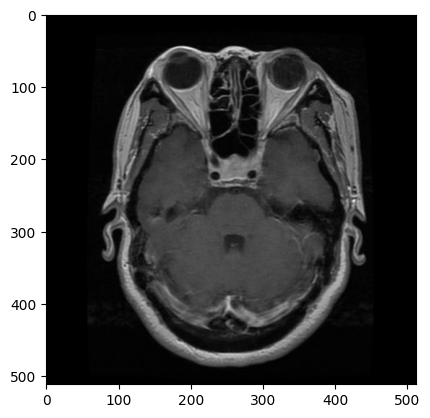

In [64]:
plt.imshow(img_array);


In [65]:
img_array.shape


(512, 512, 3)

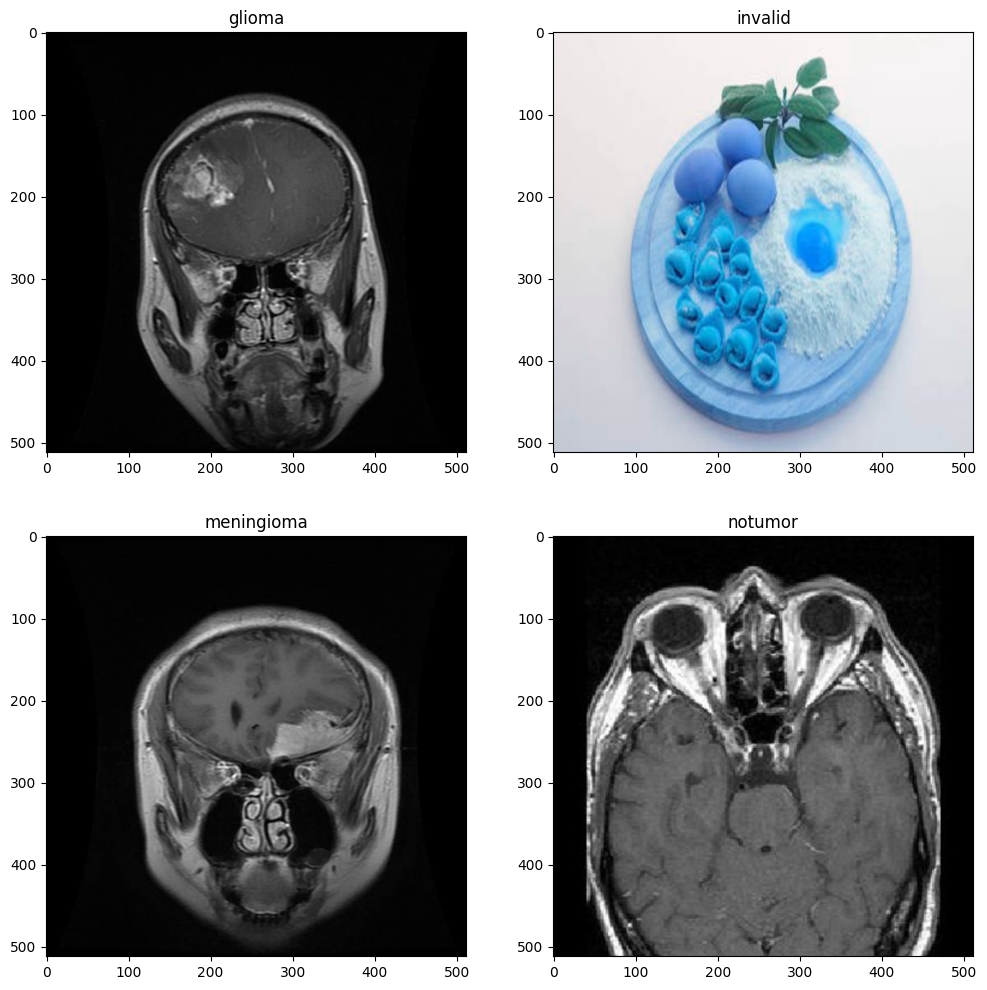

In [66]:
#plotting image of each tumor type
plt.figure(figsize=(12, 12))

images_path = ['/glioma/Tr-glTr_0000.jpg', '/invalid/138.jpg', '/meningioma/Tr-meTr_0000.jpg', '/notumor/Tr-noTr_0000.jpg', '/pituitary/Tr-piTr_0000.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(data_dir + images_path[i])
    img = cv2.resize(img,(512, 512))
    plt.imshow(img)
    plt.title(categories[i])
    

#Image Resizing (for better accuracy)

In [43]:
"""#required headerfiles
import numpy as np 
from tqdm import tqdm
import cv2
import os
import imutils
"""

'#required headerfiles\nimport numpy as np \nfrom tqdm import tqdm\nimport cv2\nimport os\nimport imutils\n'

In [45]:
"""def crop_img(img):
	
	#Finds the extreme points on the image and crops the rectangular out of them
	
	gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	gray = cv2.GaussianBlur(gray, (3, 3), 0)

	#threshold the image, then perform a series of erosions +
	#dilations to remove any small regions of noise
	thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
	thresh = cv2.erode(thresh, None, iterations = 2)
	thresh = cv2.dilate(thresh, None, iterations = 2)

	#find contours in thresholded image, then grab the largest one
	cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key = cv2.contourArea)

	#find the extreme points
	extLeft = tuple(c[c[:, :, 0].argmin()][0])
	extRight = tuple(c[c[:, :, 0].argmax()][0])
	extTop = tuple(c[c[:, :, 1].argmin()][0])
	extBot = tuple(c[c[:, :, 1].argmax()][0])
	ADD_PIXELS = 0
	new_img = img[extTop[1]-ADD_PIXELS:extBot[1] + 
               ADD_PIXELS, extLeft[0] - ADD_PIXELS:extRight[0] + 
               ADD_PIXELS].copy()
	
	return new_img
"""

'def crop_img(img):\n\t\n\t#Finds the extreme points on the image and crops the rectangular out of them\n\t\n\tgray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)\n\tgray = cv2.GaussianBlur(gray, (3, 3), 0)\n\n\t#threshold the image, then perform a series of erosions +\n\t#dilations to remove any small regions of noise\n\tthresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]\n\tthresh = cv2.erode(thresh, None, iterations = 2)\n\tthresh = cv2.dilate(thresh, None, iterations = 2)\n\n\t#find contours in thresholded image, then grab the largest one\n\tcnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)\n\tcnts = imutils.grab_contours(cnts)\n\tc = max(cnts, key = cv2.contourArea)\n\n\t#find the extreme points\n\textLeft = tuple(c[c[:, :, 0].argmin()][0])\n\textRight = tuple(c[c[:, :, 0].argmax()][0])\n\textTop = tuple(c[c[:, :, 1].argmin()][0])\n\textBot = tuple(c[c[:, :, 1].argmax()][0])\n\tADD_PIXELS = 0\n\tnew_img = img[extTop[1]-ADD_PIXELS:extBot[1] + \n   

In [46]:
"""if __name__ == "__main__":
	training = "/content/drive/MyDrive/New_Brain_Tumor_Dataset/Training"
	testing = "/content/drive/MyDrive/New_Brain_Tumor_Dataset/Testing"
	training_dir = os.listdir(training)
	testing_dir = os.listdir(testing)
	IMG_SIZE = 256

	for dir in training_dir:
		save_path = '/content/drive/MyDrive/New_Brain_Tumor_Dataset/cleaned_Training/' + dir
		path = os.path.join(training, dir)
		image_dir = os.listdir(path)
		for img in image_dir:
			image = cv2.imread(os.path.join(path, img))
			new_img = crop_img(image)
			new_img = cv2.resize(new_img, (IMG_SIZE, IMG_SIZE))
			if not os.path.exists(save_path):
				os.makedirs(save_path)
			cv2.imwrite(save_path + '/' + img, new_img)
	
	for dir in testing_dir:
		save_path = '/content/drive/MyDrive/New_Brain_Tumor_Dataset/cleaned_Testing/' + dir
		path = os.path.join(testing, dir)
		image_dir = os.listdir(path)
		for img in image_dir:
			image = cv2.imread(os.path.join(path, img))
			new_img = crop_img(image)
			new_img = cv2.resize(new_img, (IMG_SIZE, IMG_SIZE))
			if not os.path.exists(save_path):
				os.makedirs(save_path)
			cv2.imwrite(save_path + '/' + img, new_img)

"""

'if __name__ == "__main__":\n\ttraining = "/content/drive/MyDrive/New_Brain_Tumor_Dataset/Training"\n\ttesting = "/content/drive/MyDrive/New_Brain_Tumor_Dataset/Testing"\n\ttraining_dir = os.listdir(training)\n\ttesting_dir = os.listdir(testing)\n\tIMG_SIZE = 256\n\n\tfor dir in training_dir:\n\t\tsave_path = \'/content/drive/MyDrive/New_Brain_Tumor_Dataset/cleaned_Training/\' + dir\n\t\tpath = os.path.join(training, dir)\n\t\timage_dir = os.listdir(path)\n\t\tfor img in image_dir:\n\t\t\timage = cv2.imread(os.path.join(path, img))\n\t\t\tnew_img = crop_img(image)\n\t\t\tnew_img = cv2.resize(new_img, (IMG_SIZE, IMG_SIZE))\n\t\t\tif not os.path.exists(save_path):\n\t\t\t\tos.makedirs(save_path)\n\t\t\tcv2.imwrite(save_path + \'/\' + img, new_img)\n\t\n\tfor dir in testing_dir:\n\t\tsave_path = \'/content/drive/MyDrive/New_Brain_Tumor_Dataset/cleaned_Testing/\' + dir\n\t\tpath = os.path.join(testing, dir)\n\t\timage_dir = os.listdir(path)\n\t\tfor img in image_dir:\n\t\t\timage = cv2.imr

Preparing our data using Data Generator / Data Augmentation

In [67]:
from keras.preprocessing.image import ImageDataGenerator

In [68]:

#for traditional models
def processImages1(path):
  """
  input: Path
  output: Processed images
  """
  
  #to increase the dimensions of image for more details and in-depth analysis
  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, rescale = 1./255, horizontal_flip = True)
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = "categorical")
  
  return image


In [69]:
path = '/content/drive/MyDrive/Colab Notebooks/New_Brain_Tumor_Dataset/Training'
train_data = processImages1(path)


Found 7041 images belonging to 5 classes.


In [70]:
#for traditional models
def processImages2(path):
  """
  input: Path
  output: Processed images
  """
  
  #to increase the dimensions of image for more details and in-depth analysis
  image_data = ImageDataGenerator(rescale = 1./255)
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = "categorical")

  return image


In [71]:
path = '/content/drive/MyDrive/Colab Notebooks/New_Brain_Tumor_Dataset/Testing'
test_data = processImages2(path)


Found 1839 images belonging to 5 classes.


#Building the CNN Model

In [72]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras


In [77]:
model = Sequential()
#kernal_size is the size of convolution_filter
#1st convolution layer
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', input_shape = (224, 224, 3), padding = 'same'))

#2nd convolution layer
model.add(Conv2D(filters = 36, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))  #to avoid overfitting of dataset

#3rd convolution layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

#4th convolution layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

#5th convolution layer
model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Dropout(rate = 0.25))  #data dropout

model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))  #precaution for overfitting
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 5, activation = 'softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 conv2d_11 (Conv2D)          (None, 222, 222, 36)      5220      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 36)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 64)      20800     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 128)      

In [78]:
#categorialCrossentropy because images need to be classified into 4 classes
#and they are mutually exclusive
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [101]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping 

#early stopping - to avoid wastage of resources for training all the images
es = EarlyStopping(monitor = "loss", min_delta = 0.01, patience = 7, verbose = 1, mode = 'auto')  #hyper-parameters

#reduce learning-rate
rl = ReduceLROnPlateau(monitor = "val_loss", factor = 0.2, patience = 6, verbose = 1)

#model check-point
mc = ModelCheckpoint(monitor = "val_accuracy", filepath = "/content/drive/MyDrive/Colab Notebooks/New_Brain_Tumor_Dataset/newbraintumormodel.h5", verbose = 1, save_best_only = True, mode = 'auto')

cd = [es, rl, mc]


#Model Training

In [102]:
#tells about model working - val_data, val_accuracy
hs = model.fit_generator(generator = train_data, 
                         steps_per_epoch = 7028//32, 
                         epochs = 35, #number of times
                         verbose = 1, #displaying the execution
                         validation_data = test_data, 
                         validation_steps = 1839//32, 
                         callbacks = cd)

Epoch 1/35
219/219 [==============================] - ETA: 0s - loss: 0.0665 - accuracy: 0.9781
Epoch 1: val_accuracy improved from -inf to 0.98300, saving model to /content/drive/MyDrive/Colab Notebooks/New_Brain_Tumor_Dataset/newbraintumormodel.h5
219/219 [==============================] - 127s 570ms/step - loss: 0.0665 - accuracy: 0.9781 - val_loss: 0.0612 - val_accuracy: 0.9830 - lr: 0.0010
Epoch 2/35
219/219 [==============================] - ETA: 0s - loss: 0.0885 - accuracy: 0.9713
Epoch 2: val_accuracy improved from 0.98300 to 0.98575, saving model to /content/drive/MyDrive/Colab Notebooks/New_Brain_Tumor_Dataset/newbraintumormodel.h5
219/219 [==============================] - 127s 578ms/step - loss: 0.0885 - accuracy: 0.9713 - val_loss: 0.0494 - val_accuracy: 0.9857 - lr: 0.0010
Epoch 3/35
219/219 [==============================] - ETA: 0s - loss: 0.0612 - accuracy: 0.9799
Epoch 3: val_accuracy did not improve from 0.98575
219/219 [==============================] - 127s 580ms/

#Performance Metrices

In [ ]:
"""
the overfitting of model does not take place when (loss and val_loss) are 
closely near to each other and when (categorical_accuracy and val_categorical_accuracy) 
does not have difference of greater than 5
(PURE OBSERVATION)
"""


'\nthe overfitting of model does not take place when (loss and val_loss) are \nclosely near to each other and when (categorical_accuracy and val_categorical_accuracy) \ndoes not have difference of greater than 5\n(PURE OBSERVATION)\n'

Accuracy

In [103]:
#model accuracy
from keras.models import load_model

model = load_model("/content/drive/MyDrive/Colab Notebooks/New_Brain_Tumor_Dataset/newbraintumormodel.h5")

In [104]:
acc = model.evaluate_generator(test_data)[1]
print(f"The accuracy of the model is: {acc * 100}%")


The accuracy of the model is: 99.07558560371399%


Confusion Matrix

In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
#confusion matrix of model
conf = model.predict_generator(test_data, 1839//32 + 1)
confusion = np.argmax(conf, axis = 1)
print(confusion_matrix(test_data.classes, confusion))

[[ 57  85  57  55  46]
 [ 86 153  85 115  89]
 [ 50  96  43  72  45]
 [ 60 114  65 104  62]
 [ 42  76  58  67  57]]


#Model Graphical Representation

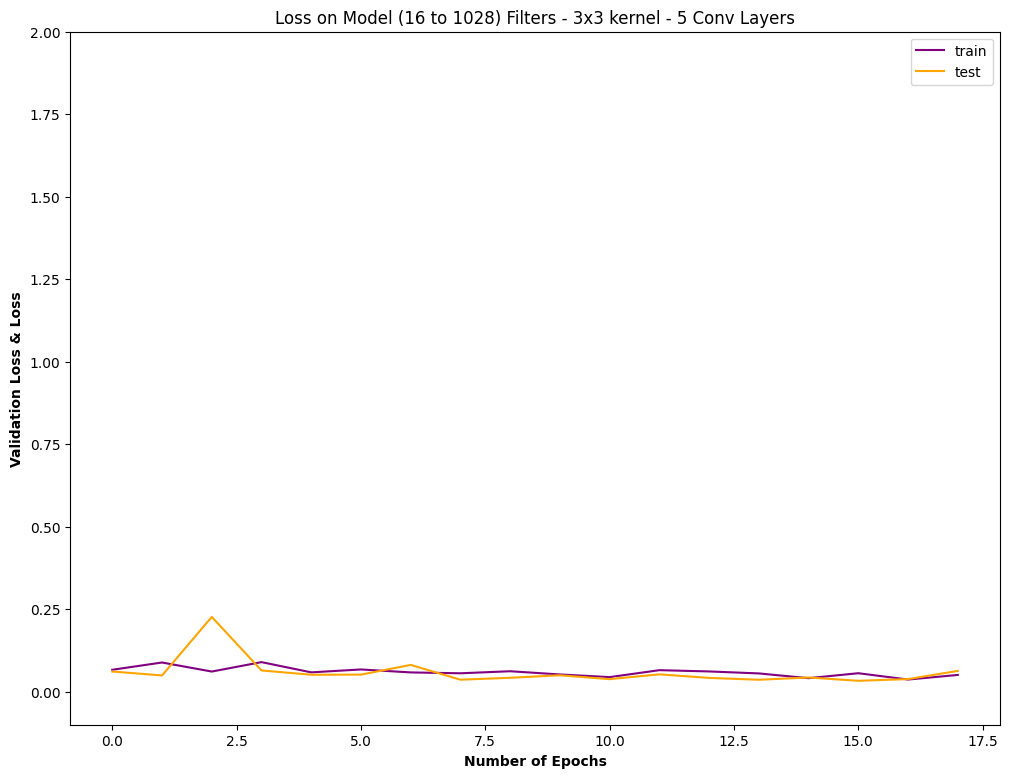

In [107]:
fig, axs = plt.subplots(1, 1, figsize = (12, 9), linewidth = 1.5)

axs.plot(hs.history["loss"], c = "purple")
axs.plot(hs.history["val_loss"], c = "orange")
axs.set_ylim([-0.1, 2])
axs.legend(["train", "test"])
axs.set_title('Loss on Model (16 to 1028) Filters - 3x3 kernel - 5 Conv Layers');
plt.xlabel('Number of Epochs', fontweight='bold')
plt.ylabel('Validation Loss & Loss', fontweight='bold')

plt.show()


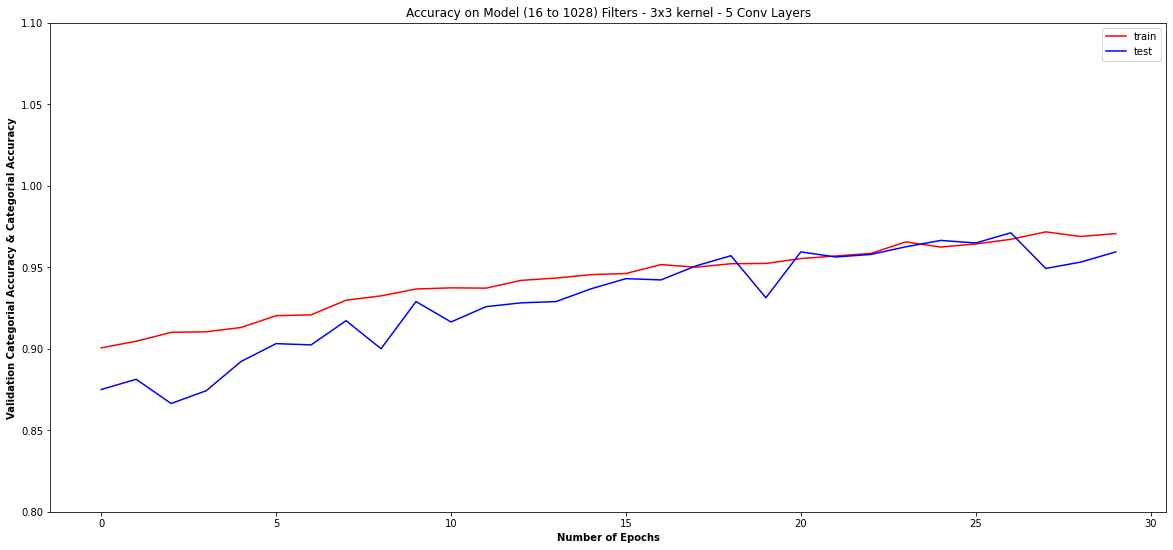

In [ ]:
fig, axs = plt.subplots(1, 1, figsize = (20, 9), linewidth = 1.5)

axs.plot(hs.history["accuracy"], c = "red")
axs.plot(hs.history["val_accuracy"], c = "blue")
axs.set_ylim([0.8, 1.1])
axs.legend(["train", "test"])
axs.set_title('Accuracy on Model (16 to 1028) Filters - 3x3 kernel - 5 Conv Layers');
plt.xlabel('Number of Epochs', fontweight='bold')
plt.ylabel("Validation Categorial Accuracy & Categorial Accuracy", fontweight='bold')

plt.show()


#Testing Model

In [108]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [109]:
train_data.class_indices

{'glioma': 0, 'invalid': 1, 'meningioma': 2, 'notumor': 3, 'pituitary': 4}

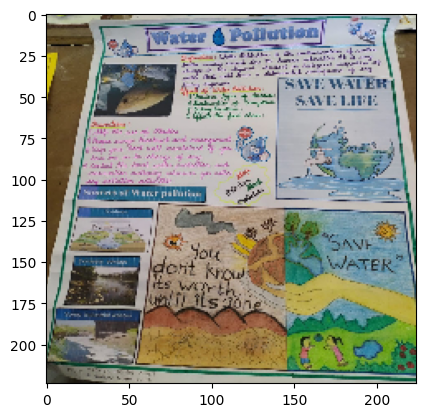

1/1 [==============================] - 0s 34ms/step
Invalid Image


In [111]:
#testing model on random images
path = "/content/drive/MyDrive/20191123_160551.jpg"
img = load_img(path, target_size = (224, 224))
input_arr = img_to_array(img) / 255  #to normalize the image

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)

prediction = np.argmax(model.predict(input_arr), axis = 1)
prediction

if prediction == 0:
  print("The MRI contains glioma tumor")
elif prediction == 1:
  print("Invalid Image")
elif prediction == 2:
  print("The MRI contains meningioma tumor")
elif prediction == 3:
  print("The MRI contains no tumor")
else:
  print("The MRI contains pituitary tumor")


Check for this also

#Saving the Best Model

In [112]:
model_version = 1
model.save(f"/content/drive/MyDrive/Colab Notebooks/New_Brain_Tumor_Dataset/{model_version}")
